In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
from scipy.stats import loglaplace,chi2
from labellines import labelLine, labelLines

dir = '/home/joe/data/jhu/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

dataConfirmed = dir + 'time_series_19-covid-Confirmed.csv'
dataDeaths = dir + 'time_series_19-covid-Deaths.csv'
dataRecovered = dir + 'time_series_19-covid-Recovered.csv'

nTop = 10

dfConfirmed = pd.read_csv(dataConfirmed)
dfDeaths = pd.read_csv(dataDeaths)
dfRecovered = pd.read_csv(dataRecovered)
dfConfirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,411
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,1007
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,432
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,1183


In [45]:
dfC = dfConfirmed.drop(['Province/State','Lat','Long'],axis=1)
dfC.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,70,75,82,114,147,177,212,272,322,411
1,Japan,2,1,2,2,4,4,7,7,11,...,639,701,773,839,825,878,889,924,963,1007
2,Singapore,0,1,3,3,4,5,7,7,10,...,178,200,212,226,243,266,313,345,385,432
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,149,197,238,428,566,673,790,900,1030,1183


In [46]:
cumCasesName = 'Cumulative Cases'
dfG = dfC.groupby('Country/Region')[dfC.columns[-1]].sum().reset_index(name=cumCasesName)
dfT = dfG.sort_values(cumCasesName, ascending=False).head(nTop)
dfT




,Country/Region,Cumulative Cases
33,China,81305
79,Italy,53578
155,US,25489
142,Spain,25374
62,Germany,22213
75,Iran,20610
58,France,14431
85,"Korea, South",8799
147,Switzerland,6575
159,United Kingdom,5067


In [6]:
dfC = dfC.set_index('Country/Region').T
dfC = dfC.reset_index()
dfC.head()

Country/Region,index,China,Italy,Iran,Spain,Germany,France,"Korea, South",US,Switzerland,...,US,US,US,US,US,US,US,US,US,US
0,1/22/20,444,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,444,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,549,0,0,0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,761,0,0,0,0,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,1058,0,0,0,0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dfC = dfC.rename(columns={"index": 'date'})
dfC.head()

Country/Region,date,China,Italy,Iran,Spain,Germany,France,"Korea, South",US,Switzerland,...,US,US,US,US,US,US,US,US,US,US
0,1/22/20,444,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,444,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,549,0,0,0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,761,0,0,0,0,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,1058,0,0,0,0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0


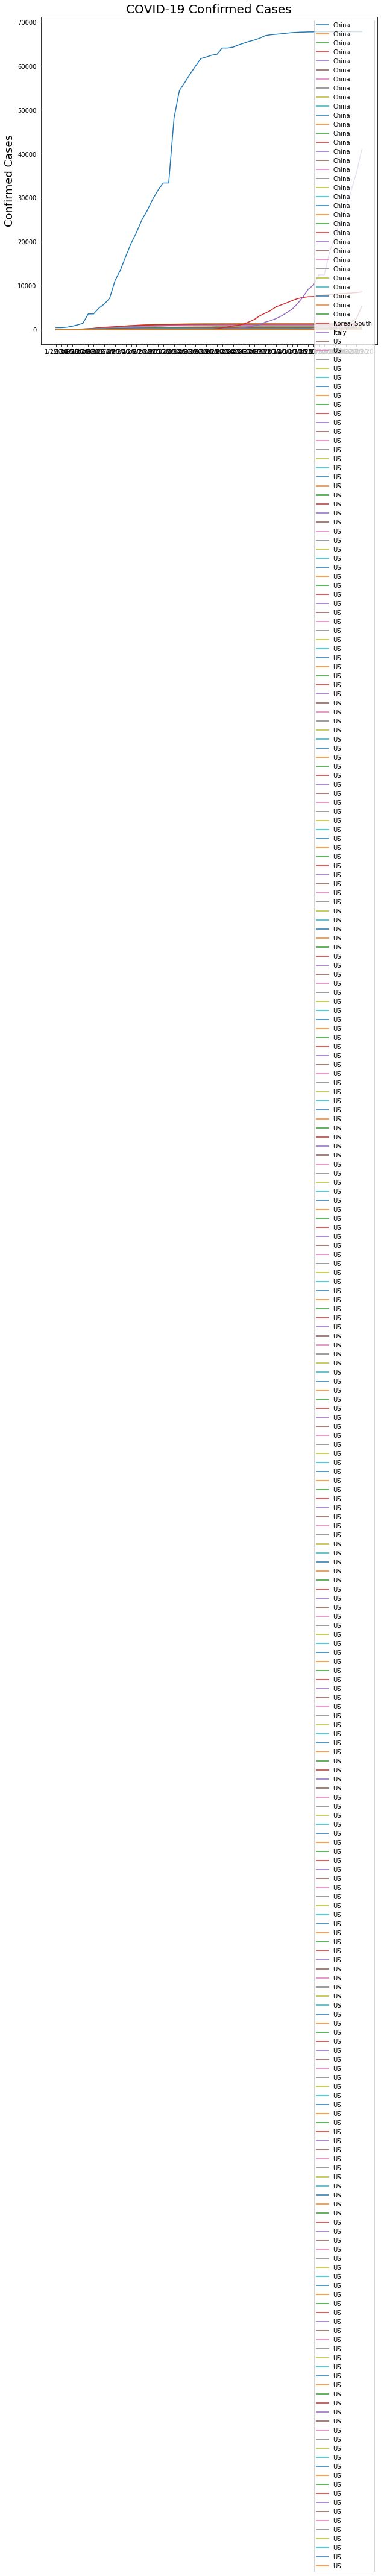

In [8]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.set_title("COVID-19 Confirmed Cases", fontsize=20)
ax1.set_ylabel('Confirmed Cases', color='black',fontsize=18)
plt.plot(dfC['date'],dfC['China'], label='China')
plt.plot(dfC['date'],dfC['Korea, South'], label = 'Korea, South')
plt.plot(dfC['date'],dfC['Italy'], label='Italy')
plt.plot(dfC['date'],dfC['US'], label='US')
plt.legend()
           
